In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [2]:
import os

# Define the path to the dataset
dataset_path = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits'

# List files in the dataset directory
print("Files in dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))

Files in dataset directory:
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits\combined_folder\test\0\0.002.png
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits\combined_folder\test\0\0.003.png
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits\combined_folder\test\0\0.009.png
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits\combined_folder\test\0\0.013.png
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits\combined_folder\test\0\0.018.png
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits\combined_folder\test\0\0.021.png
E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and A

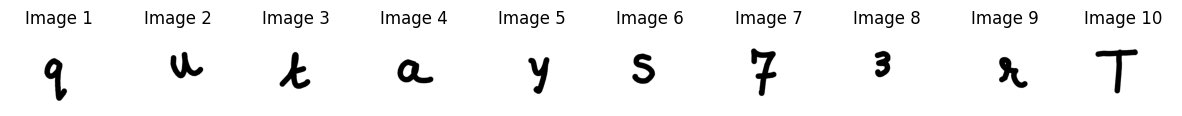

In [3]:
import random
def display_random_images(data_dir, num_images=10):
    # Get all subdirectories (classes)
    classes = os.listdir(data_dir)
    
    # Create a list to store image paths
    image_paths = []
    
    # Iterate through each class
    for class_dir in classes:
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            # Get all image files in the class directory
            files = os.listdir(class_path)
            for file in files:
                if file.endswith('.png'):
                    image_paths.append(os.path.join(class_path, file))
    
    # Randomly select image paths
    random_images = random.sample(image_paths, num_images)
    
    # Plot images
    plt.figure(figsize=(15, 15))
    
    for i, img_path in enumerate(random_images):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'Image {i + 1}')
        plt.axis('off')
    
    plt.show()

# Define the path to the test dataset directory
test_dir = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits/combined_folder/test'

# Display 10 random images
display_random_images(test_dir, num_images=10)

In [4]:
# Define the data directories
train_dir = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits/combined_folder/train'
test_dir = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits/combined_folder/test'

# Create ImageDataGenerator instances for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images
    batch_size=32,
    class_mode='categorical'
)

Found 2728 images belonging to 62 classes.
Found 682 images belonging to 62 classes.


In [5]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\Deeya Shalya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,198 (2.64 MB)

 Trainable params: 691,198 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=test_generator
)

# Save the model
model.save('handwritten_character_recognition_model.h5')

Epoch 1/200


C:\Users\Deeya Shalya\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.0191 - loss: 4.1438 - val_accuracy: 0.0176 - val_loss: 4.1225
Epoch 2/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.0137 - loss: 4.1278 - val_accuracy: 0.0220 - val_loss: 4.1120
Epoch 3/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 63s 683ms/step - accuracy: 0.0273 - loss: 4.1122 - val_accuracy: 0.0425 - val_loss: 3.9306
Epoch 4/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 45s 498ms/step - accuracy: 0.0388 - loss: 3.9704 - val_accuracy: 0.0748 - val_loss: 3.5334
Epoch 5/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.0578 - loss: 3.7661 - val_accuracy: 0.1305 - val_loss: 3.2447
Epoch 6/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 277ms/step - accuracy: 0.0916 - loss: 3.5083 - val_accuracy: 0.1745 - val_loss: 3.1273
Epoch 7/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 59s 646ms/step - accuracy: 0.1196 - loss: 3.2910 - val_accuracy: 0.2815 - val_loss: 2.5766
Epoch 8/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 60s 660ms/step - accuracy: 0.1576 - loss: 3.1350 - val_accuracy: 0.

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.8152 - loss: 0.6630
Test accuracy: 0.8226
Test loss: 0.6127


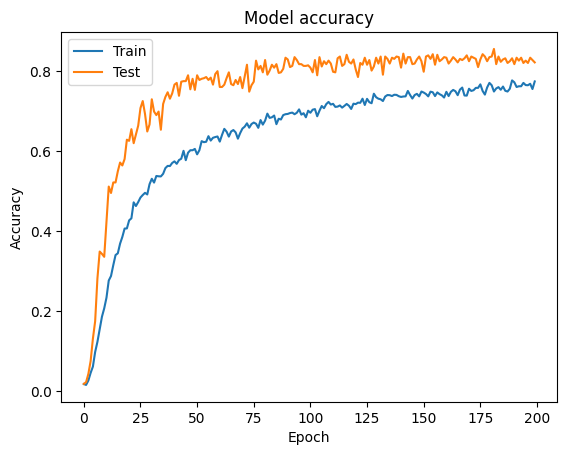

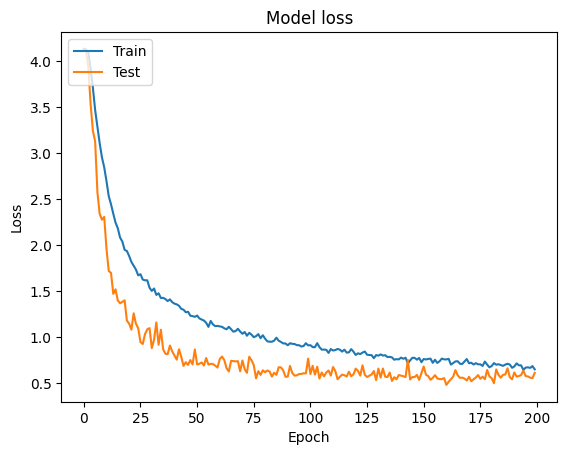

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
# Load a new image for prediction
image_path = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits/combined_folder/test/0/0.045.png'
img = image.load_img(image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Make batch of one

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {predicted_class[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted class: 6


Found 682 images belonging to 62 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


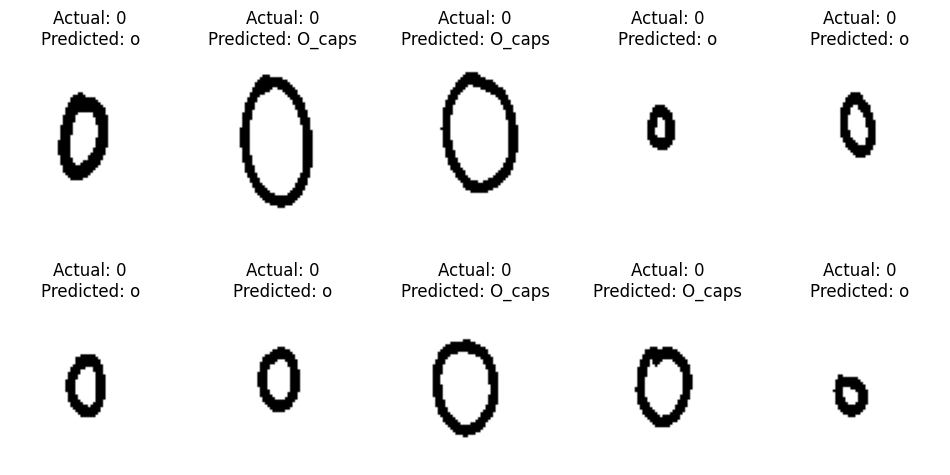

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model  # Assuming you have a trained model

# Define data directories
train_dir = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits/combined_folder/train'
test_dir = 'E:/PG- M. Sc/Semester 3/Deep Learning Algorithms and Applications/LAB/dataset/handwritten-english-characters-and-digits/combined_folder/test'

# Create ImageDataGenerator instances
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Adjust size as needed
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure predictions are aligned with true labels
)

# Extract images and labels from the test generator
x_test, y_test = next(test_generator)

# Load your trained model
model = load_model('handwritten_character_recognition_model.h5')  # Adjust path as necessary

# Make predictions
predictions = model.predict(x_test)

# Mapping class indices back to the actual labels
class_labels = list(test_generator.class_indices.keys())  # Get class names

# Plot some sample predictions
plt.figure(figsize=(12, 6))
for i in range(10):  # Display first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])  # Display the image
    actual_label = class_labels[np.argmax(y_test[i])]  # Get actual class name
    predicted_label = class_labels[np.argmax(predictions[i])]  # Get predicted class name
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()